## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Preprocessing and Scaling

#### Data Input 

In [4]:
df = pd.read_csv('./DATA/heart.csv')

#### Feature-Target Split

In [5]:
X = df.drop('target',axis=1)
y = df['target']

#### Train Test Split 

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

#### Scaling

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Logistic Regression Model 

#### Imports 

In [8]:
from sklearn.linear_model import LogisticRegressionCV 

#### Model Definition 

In [9]:
log_model = LogisticRegressionCV()

#### Model Training

In [10]:
log_model.fit(scaled_X_train,y_train)

LogisticRegressionCV()

#### Obtaining Parameters of the LR Model 

In [11]:
log_model.C_

array([0.04641589])

In [12]:
log_model.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [13]:
log_model.coef_

array([[-0.09624234, -0.39455733,  0.53541263, -0.13845013, -0.0882132 ,
         0.02495565,  0.08083019,  0.29896895, -0.33440044, -0.35252781,
         0.25100118, -0.49732614, -0.37440968]])

#### Coefficient Visualization of the LR Model 

In [14]:
coefs = pd.Series(index=X.columns,data=log_model.coef_[0])

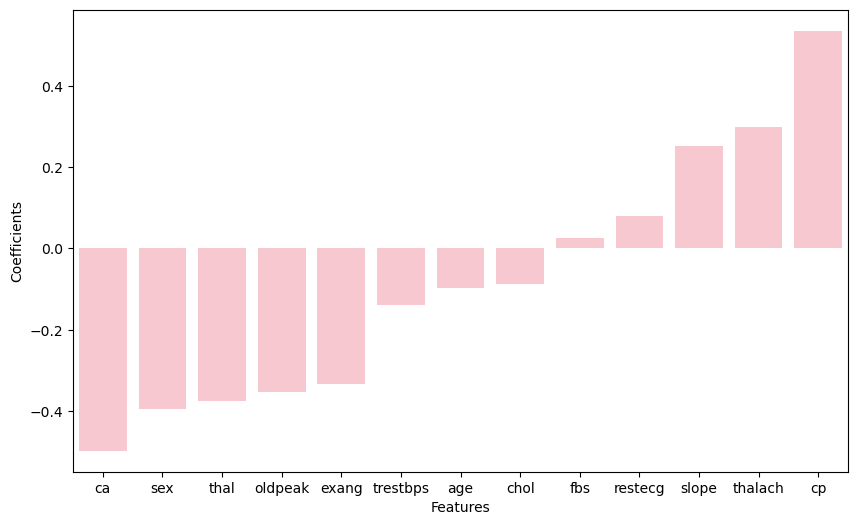

In [18]:
coefs = coefs.sort_values()

plt.figure(figsize=(10,6))
sns.barplot(x=coefs.index,y=coefs.values, color='pink');
plt.xlabel("Features")
plt.ylabel("Coefficients");

## Model Test Prediction and Evaluation

In [20]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [21]:
y_pred = log_model.predict(scaled_X_test)

#### Confusion Matrix

In [24]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[12,  3],
       [ 2, 14]], dtype=int64)

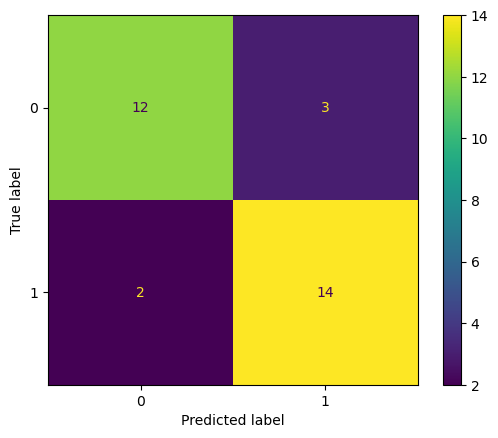

In [26]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

#### Classification Report 

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



#### Precision-Recall Curve

##### PRC for Negative Value of Classification

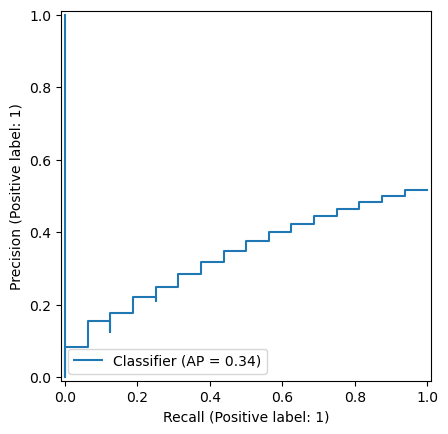

In [31]:
from sklearn.metrics import PrecisionRecallDisplay

y_scores = log_model.predict_proba(scaled_X_test)[:, 0]
PrecisionRecallDisplay.from_predictions(y_test, y_scores)

##### Precision Recall Curve for Target=1

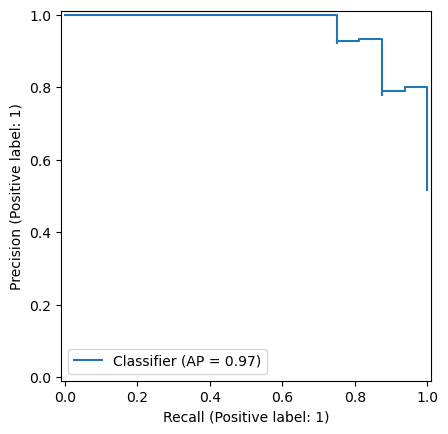

In [32]:
y_scores = log_model.predict_proba(scaled_X_test)[:, 1]
PrecisionRecallDisplay.from_predictions(y_test, y_scores)

#### ROC Curve

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegressionCV was fitted without feature names
  warnings.warn(


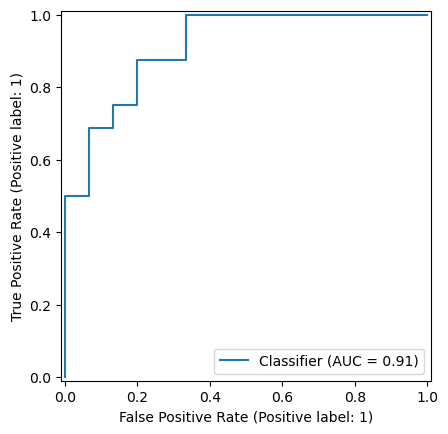

In [33]:
from sklearn.metrics import RocCurveDisplay

y_scores = log_model.predict_proba(X_test)[:, 1]
RocCurveDisplay.from_predictions(y_test, y_scores)

### Saving Model as a .pkl File

In [36]:
import joblib
joblib.dump(log_model,'./DATA/heart_disease_pred_model.pkl')

['./DATA/heart_disease_pred_model.pkl']

### SHAP Explainability of Model 

In [37]:
import shap

best_model = log_model 

explainer = shap.Explainer(best_model, scaled_X_train, feature_names=X.columns)
shap_values = explainer(scaled_X_test)

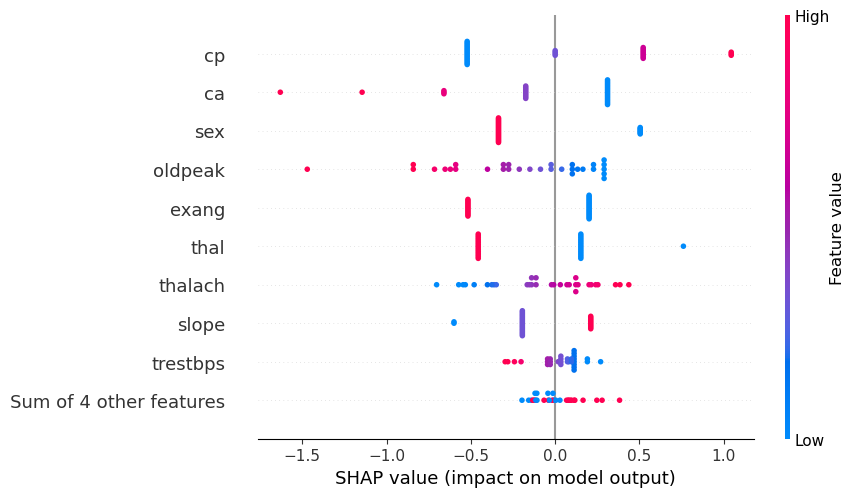

In [38]:
shap.plots.beeswarm(shap_values)